#DESCRIPTION_OF_THE_DATA ------->      السواقه فن مش عنعن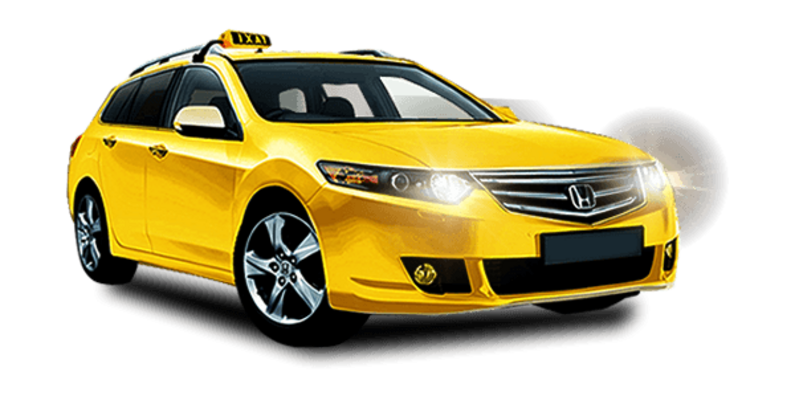
New York City Taxi and Limousine Commission (TLC) is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles
The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day.




#IMP_LIBERARIES

In [101]:
#---------------------------------------------------------------------------------------------->NUMPY
import numpy as np
#---------------------------------------------------------------------------------------------->PANDA
import pandas as pd
#---------------------------------------------------------------------------------------------->PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#---------------------------------------------------------------------------------------------->SPLITTING_DATA
from sklearn.model_selection import train_test_split
#---------------------------------------------------------------------------------------------->SCORE_FOR_REGRESSION
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
#---------------------------------------------------------------------------------------------->CONF_MATRIX
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#---------------------------------------------------------------------------------------------->EVALUATION_FOR_CLASSIFICATION(roc_curve,roc_auc_score)
from sklearn.metrics import roc_curve,roc_auc_score
#---------------------------------------------------------------------------------------------->SCORE_FOR_CLASSIFICATION(accuracy_score,recall_score,precision_score)
from sklearn.metrics import accuracy_score,recall_score,precision_score
#---------------------------------------------------------------------------------------------->Curse_of_dimensionality(SelectKBest,chi2,f_classif,f_oneway,f_regression-PCA)
from sklearn.feature_selection import SelectKBest,chi2,f_classif,f_oneway,f_regression
from sklearn.decomposition import PCA
#---------------------------------------------------------------------------------------------->SCALER(MinMaxScaler, StandardScaler,PowerTransformer,RobustScaler)
from sklearn.preprocessing import MinMaxScaler, StandardScaler,PowerTransformer,RobustScaler
#---------------------------------------------------------------------------------------------->GRIDSEARCH
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------------------------------->ENCODING(LabelEncoder,OrdinalEncoder,OrdinalEncoder)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OrdinalEncoder
#---------------------------------------------------------------------------------------------->CROSS_VALIDATION
from sklearn.model_selection import cross_val_score,KFold
#---------------------------------------------------------------------------------------------->CLASSIFICATION_MODELS(KNeighborsClassifier,DecisionTreeClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#---------------------------------------------------------------------------------------------->REGRESSION_MODELS(XGBRegressor,LinearRegression)
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
#---------------------------------------------------------------------------------------------->DATE_TIME
import datetime as dt

#-------------------------------READ_DATA _AND_FEATURES_DETAILS--------------------------------------    <

In [ ]:
data=pd.read_csv("/content/YELLOW_TAXI.csv")
data
#ID	                    Trip identification number
#VendorID	              A code indicating the TPEP provider that provided the record. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
#tpep_pickup_datetime	  The date and time when the meter was engaged.
#tpep_dropoff_datetime	The date and time when the meter was disengaged.
#Passenger_count	      The number of passengers in the vehicle. This is a driver-entered value.
#Trip_distance	        The elapsed trip distance in miles reported by the taximeter.
#PULocationID	          TLC Taxi Zone in which the taximeter was engaged
#DOLocationID	TLC       Taxi Zone in which the taximeter was disengaged
#RateCodeID	            The final rate code in effect at the end of the trip. 1= Standard rate 2=JFK 3=Newark 4=Nassau or Westchester 5=Negotiated fare 6=Group ride
#Store_and_fwd_flag	    This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. Y= store and forward trip N= not a store and forward trip
#Payment_type	          A numeric code signifying how the passenger paid for the trip. 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip
#Fare_amount	          The time-and-distance fare calculated by the meter.
#Extra	                Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
#MTA_tax	              $0.50 MTA tax that is automatically triggered based on the metered rate in use
#Improvement_surcharge	$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
#Tip_amount	            Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
#Tolls_amount	          Total amount of all tolls paid in trip.
#Total_amount	          The total amount charged to passengers. Does not include cash tips.

#EDA

In [103]:
def EDA():
  Ask_EDA=input("WHAT TYPE OF DATA_SHOW (CHOOSE_THE_NUMBER_UP) ?\n")
  if Ask_EDA =='1':
   null=data.isna().sum()
   print("|----------------------------------------------------------DATA_EDA------------------------------------------------|\t\n")
   print("NULL_DATA\t\n")
   print(null)
  elif  Ask_EDA =='2':
   print("|------------------------------------------------------------------------------------------------------------------|\t\n")
   print("DATA_COLUMNS\t\n")
   columns=data.columns
   print(columns)
  elif  Ask_EDA =='3':
   print("|------------------------------------------------------------------------------------------------------------------|\t\n")
   print("DATA_INFO\t\n")
   info=data.info()
  elif  Ask_EDA =='4':
   print("|---------------------------------------------------------DATA_HEAD------------------------------------------------|\t\n")
   print(data.head())
  elif  Ask_EDA =='5':
   print("|---------------------------------------------------------DATA_VALUE_COUNT-----------------------------------------|\t\n")
   print(data.value_counts())
  elif  Ask_EDA =='6':
   print("|---------------------------------------------------------DATA_DESCRIBE--------------------------------------------|\t\n")
   print(data.describe())
  else:
    print("ERROR_IN_WRITTING-------------> PLZ SELECT THE RIGHT_NUMBER")
    EDA()

#RUN_EDA

In [104]:
#[1] --->NULL

#[2] --->COLUMNS

#[3] --->INFO

#[4] --->HEAD

#[5] --->DATA_VALUE_COUNT

#[6] --->DATA_DESCRIBE

EDA()

WHAT TYPE OF DATA_SHOW (CHOOSE_THE_NUMBER_UP) ?
1
|----------------------------------------------------------DATA_EDA------------------------------------------------|	

NULL_DATA	

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            1
RatecodeID               1
store_and_fwd_flag       1
PULocationID             1
DOLocationID             1
payment_type             1
fare_amount              1
extra                    1
mta_tax                  1
tip_amount               1
tolls_amount             1
improvement_surcharge    1
total_amount             1
dtype: int64


In [105]:
data.dropna(inplace=True)

#ENCODING_BY(LIST_COMPERHENSIVE)

In [106]:
data['store_and_fwd_flag'].value_counts()

N    10305
Y       41
Name: store_and_fwd_flag, dtype: int64

In [107]:
data['VendorID'].value_counts()

2    5718
1    4628
Name: VendorID, dtype: int64

In [108]:
data['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [109]:
ENCODING_MAP = {'Y': 1,'N':0}
data['store_and_fwd_flag'] = [ENCODING_MAP[i] for i in data['store_and_fwd_flag']]

In [110]:
data['store_and_fwd_flag'].unique()

array([0, 1])

#FOR CREATING COLUMN RELATED TO TIME

In [111]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], errors='coerce')
data['DATE_HOURS'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()/3600

In [112]:
data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,DATE_HOURS
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1.0,0,100.0,231.0,1.0,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0.234444
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1.0,0,186.0,43.0,1.0,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0.441667
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1.0,0,262.0,236.0,1.0,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0.120000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1.0,0,188.0,97.0,1.0,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0.504167
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1.0,0,4.0,112.0,2.0,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0.278611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10341,80809305,1,2017-09-26 07:38:16,2017-09-26 07:44:27,1,1.30,1.0,0,100.0,163.0,2.0,6.5,0.0,0.5,0.00,0.0,0.3,7.30,0.103056
10342,30474901,1,2017-04-14 21:09:44,2017-04-14 21:23:36,2,1.60,1.0,0,158.0,144.0,1.0,10.0,0.5,0.5,2.80,0.0,0.3,14.10,0.231111
10343,28244446,2,2017-04-05 20:53:25,2017-04-05 21:02:37,1,1.68,1.0,0,263.0,75.0,1.0,8.5,0.5,0.5,1.96,0.0,0.3,11.76,0.153333
10344,31910670,1,2017-04-19 07:13:28,2017-04-19 07:23:22,1,2.20,1.0,0,239.0,161.0,2.0,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0.165000


#CORRELATION

In [ ]:
corr=data.corr()
print(corr)

In [114]:
corr.iloc[:,15].sort_values(ascending=False)

total_amount             1.000000
fare_amount              0.990184
tip_amount               0.825209
trip_distance            0.689290
tolls_amount             0.517846
RatecodeID               0.510457
DATE_HOURS               0.122166
extra                    0.084809
improvement_surcharge    0.031769
passenger_count          0.007652
Unnamed: 0              -0.000055
store_and_fwd_flag      -0.000266
VendorID                -0.000531
PULocationID            -0.047814
DOLocationID            -0.055680
payment_type            -0.112543
mta_tax                 -0.210877
Name: total_amount, dtype: float64

In [115]:
data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','Unnamed: 0',
           'payment_type','VendorID','mta_tax','DOLocationID',
           'PULocationID','passenger_count','store_and_fwd_flag'],axis=1,inplace=True)

In [116]:
data.columns

Index(['trip_distance', 'RatecodeID', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'DATE_HOURS'],
      dtype='object')

#PLOTTING

In [117]:
def PLOT():# BEFOR ENCODING **
  PLOTTING=input("WHAT TYPE OF PLOTTING_SHOW (CHOOSE_THE_NUMBER_UP) ?\n")
  if PLOTTING== '1':
         print(sns.pairplot(data))
         plt.show()
  elif PLOTTING=='2':
         print(sns.boxplot(data=data,palette='rainbow',orient='h'))
         plt.show()
  elif PLOTTING=='3' :
        #  print(sns.boxplot(data=data,palette='rainbow',orient='h'))
        g = sns.JointGrid(data=data, x="fare_amount", y="total_amount",height=4, ratio=8, space=.2)
        g.plot(sns.regplot, sns.boxplot)
        g = sns.JointGrid(data=data, x="trip_distance", y="total_amount",height=4, ratio=8, space=.2)
        g.plot(sns.regplot, sns.boxplot)
        g = sns.JointGrid(data=data, x="RatecodeID", y="total_amount",height=4, ratio=8, space=.2)
        g.plot(sns.regplot, sns.boxplot)
        g = sns.JointGrid(data=data, x="tip_amount", y="total_amount",height=4, ratio=8, space=.2)
        g.plot(sns.regplot, sns.boxplot)
        g = sns.JointGrid(data=data, x="tolls_amount", y="total_amount",height=4, ratio=8, space=.2)
        g.plot(sns.regplot, sns.boxplot)
        plt.show()
  elif PLOTTING=='4':
        #DIVIDED THE CORRELATION PLOTS TO UPPER TRIANGLES & LOWER TRIANGLES
        ut = np.triu(data.corr())# UPPER_TRIANGLES_MATRIX
        lt = np.tril(data.corr())# LOWER_TRIANGLE_MATRIX
        fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (20,7))
        plt.subplot(1,2,1)
        sns.heatmap(data.corr(),cmap = 'copper',cbar = 'True',mask = ut,annot_kws={"size":30})
        plt.title('Correlation Matrix : Upper Triangular Format')
        plt.subplot(1,2,2)
        sns.heatmap(data.corr(),cmap='copper',cbar = 'True',mask = lt,annot_kws={"size":30})
        plt.title('Correlation Matrix : Lower Triangular Format')
        plt.show()
        # CORR.style.background_gradient(cmap='seismic').set_precision(2)
        corr=data.corr()
        print(corr)
  else :
         print('ERROR---------->YOU DONT CHOOSE ANY PLOT')
         PLOT()

#RUN_PLOTTING_OUTLIERS_CORRELATION

In [ ]:
#[1]---> (pairplot)--------> PLOT_JOINT_GRID_WITH_OUTLIERS

#[2]---> (BOXPLOT) --------> PLOT_PAIR_PLOT

#[3]---> (JointGrid)  --------> PLOT_DATA_OUTLIERS

#[4]---> (Correlation)  --------> PLOT_CORRELATION

PLOT()

#SPLITTING_DATA

In [119]:
x=data.loc[:,data.columns != 'total_amount']
y=data['total_amount']

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train,x_valid,y_train,y_valid =train_test_split(x_train,y_train,test_size=.1, random_state=42)

#PCA

In [121]:
pca = PCA(n_components=8) # FEATURES SHOULD BE LESS THAN THE NUMBER OF COLUMNS-1 (-1 IS THE OUT_PUT)
x_train_pca = pca.fit_transform(x_train)
x_valid_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

#SCALLING

In [122]:
# scaler = {
#             StandardScaler(),
#             MinMaxScaler(feature_range=(0,1)),
#             MinMaxScaler(feature_range=(-1,1)),
#             PowerTransformer(),
#             RobustScaler(unit_variance=True)
#         }
scaler =StandardScaler()
x_train_sc=scaler.fit_transform(x_train_pca)
x_test_sc=scaler.transform(x_test_pca)
x_valid_sc=scaler.transform(x_valid_pca)
scaler =RobustScaler(unit_variance=True)
x_train_ro=scaler.fit_transform(x_train_pca)
x_test_ro=scaler.transform(x_test_pca)
x_valid_ro=scaler.transform(x_valid_pca)
scaler =MinMaxScaler(feature_range=(0,1))
x_train_mm=scaler.fit_transform(x_train_pca)
x_test_mm=scaler.transform(x_test_pca)
x_valid_mm=scaler.transform(x_valid_pca)

#MODELSللاسف الموديل ريجريشن مش عارف ليه مش بيشتغل على الكلاسيفيكيشن

In [123]:
def GRID(MODEL_TYPE,MODELL,VALID_TYPE,SCALLER):
  RUN=input("DO YOU WANT TO RUN MODEL ?\n")
  if RUN== '1':
#---------------------------------------------KNN_VALIDATION_CLASSIFIER--------------------------------------------------#

    if MODEL_TYPE == 'C':
     if MODELL == 'KNN_C':
      if VALID_TYPE == 'V':
#---------------------------------------------KNN_V_StandardScaler_SCALER------------------------------------------------------#

       if SCALLER=='StandardScaler':

#---------------------------------------------KNN_V_GRIDSEARCH_StandardScaler_SCALER---------------------------------------------------#

        KNN_CLAS_V = KNeighborsClassifier()
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_V,param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_KNN_CLAS.fit(x_train_sc,y_train)
        y_pred_test_KNN_CLAS=grid_search_KNN_CLAS.predict(x_test_sc)
        y_pred_valid_KNN_CLASS=grid_search_KNN_CLAS.predict(x_valid_sc)
        y_pred_train_KNN_CLAS=grid_search_KNN_CLAS.predict(x_train_sc)

#---------------------------------------------KNN_V_confusion_matrix_StandardScaler_SCALER---------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_V_ACCURACY_StandardScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("ACC_score_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Recall_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Precesion_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
#---------------------------------------------KNN_V_MinMaxScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='MinMaxScaler':
        KNN_CLAS_V = KNeighborsClassifier()
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_V,param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_KNN_CLAS.fit(x_train_mm,y_train)
        y_pred_test_KNN_CLAS=grid_search_KNN_CLAS.predict(x_test_mm)
        y_pred_valid_KNN_CLASS=grid_search_KNN_CLAS.predict(x_valid_mm)
        y_pred_train_KNN_CLAS=grid_search_KNN_CLAS.predict(x_train_mm)

#---------------------------------------------KNN_V_confusion_MinMaxScaler_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_V_ACCURACY_MinMaxScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("ACC_score_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Recall_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Precesion_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#---------------------------------------------KNN_V_RobustScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='RobustScaler':
        KNN_CLAS_V = KNeighborsClassifier()
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_V,param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_KNN_CLAS.fit(x_train_ro,y_train)
        y_pred_test_KNN_CLAS=grid_search_KNN_CLAS.predict(x_test_ro)
        y_pred_valid_KNN_CLASS=grid_search_KNN_CLAS.predict(x_valid_ro)
        y_pred_train_KNN_CLAS=grid_search_KNN_CLAS.predict(x_train_ro)

#---------------------------------------------KNN_V_confusion_RobustScaler_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_V_ACCURACY_RobustScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("ACC_score_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Recall_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Precesion_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
#---------------------------------------------KNN_V_NO_SCALER--------------------------------------------------------------#

       elif SCALLER=='NO':
        KNN_CLAS_V = KNeighborsClassifier()
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_V,param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_KNN_CLAS.fit(x_train_pca,y_train)
        y_pred_test_KNN_CLAS=grid_search_KNN_CLAS.predict(x_test_pca)
        y_pred_valid_KNN_CLASS=grid_search_KNN_CLAS.predict(x_valid_pca)
        y_pred_train_KNN_CLAS=grid_search_KNN_CLAS.predict(x_train_pca)

#---------------------------------------------KNN_V_confusion_NO_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_V_ACCURACY_NO_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("ACC_score_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Recall_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Precesion_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#---------------------------------------------KNN_CROSS_VALIDATION-----------------------------------------------------------------------#

      elif  VALID_TYPE == 'CV':

#---------------------------------------------KNN_CV_StandardScaler_SCALER---------------------------------------------------------------#

       if SCALLER=='StandardScaler':
#---------------------------------------------CROSS_VALIDATION-----------------------------------------------------------------------#

        KNN_CLAS_CV = KNeighborsClassifier()
        KF = KFold(n_splits=3)
        score_KNN_CLAS_CV =cross_val_score(KNN_CLAS_CV,x_train_sc,y_train,cv=KF)
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_CV ,param_grid=params,scoring='recall',cv=KF)
        grid_search_KNN_CLAS.fit(x_train_sc,y_train)
        y_pred_test_KNN_CLAS=grid_search_KNN_CLAS.predict(x_test_sc)
        y_pred_train_KNN_CLAS=grid_search_KNN_CLAS.predict(x_train_sc)

#---------------------------------------------KNN_CV_confusion_matrix_StandardScaler_SCALER---------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_CV_ACCURACY_StandardScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("ACC_score_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Recall_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Precesion_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
#---------------------------------------------KNN_CV_MinMaxScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='MinMaxScaler':
        KNN_CLAS_CV = KNeighborsClassifier()
        KF = KFold(n_splits=3)
        score_KNN_CLAS_CV =cross_val_score(KNN_CLAS_CV,x_train_mm,y_train,cv=KF)
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_CV,param_grid=params,verbose = 1, n_jobs = -1,cv=KF)
        grid_search_KNN_CLAS.fit(x_train_mm,y_train)
        y_pred_test_KNN_CLAS=grid_search_KNN_CLAS.predict(x_test_mm)
        y_pred_train_KNN_CLAS=grid_search_KNN_CLAS.predict(x_train_mm)

#---------------------------------------------KNN_CV_confusion_MinMaxScaler_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_CV_ACCURACY_MinMaxScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("ACC_score_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Recall_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Precesion_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#---------------------------------------------KNN_CV_RobustScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='RobustScaler':
        KNN_CLAS_CV = KNeighborsClassifier()
        KF = KFold(n_splits=3)
        score_KNN_CLAS_CV =cross_val_score(KNN_CLAS_CV,x_train_ro,y_train,cv=KF)
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_CV,param_grid=params,verbose = 1, n_jobs = -1,cv=KF)
        grid_search_KNN_CLAS.fit(x_train_ro,y_train)
        y_pred_test_KNN_CLAS=grid_search_KNN_CLAS.predict(x_test_ro)
        y_pred_train_KNN_CLAS=grid_search_KNN_CLAS.predict(x_train_ro)

#---------------------------------------------KNN_CV_confusion_RobustScaler_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_CV_ACCURACY_RobustScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("ACC_score_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Recall_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Precesion_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
#---------------------------------------------KNN_CV_NO_SCALER--------------------------------------------------------------#

       elif SCALLER=='NO':
        KNN_CLAS_CV = KNeighborsClassifier()
        KF = KFold(n_splits=3)
        score_KNN_CLAS_CV =cross_val_score(KNN_CLAS_CV,x_train_pca,y_train,cv=KF)
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_CV,param_grid=params,verbose = 1, n_jobs = -1,cv=KF)
        grid_search_KNN_CLAS.fit(x_train_pca,y_train)
        y_pred_test_KNN_CLAS=grid_search_KNN_CLAS.predict(x_test_pca)
        y_pred_train_KNN_CLAS=grid_search_KNN_CLAS.predict(x_train_pca)

#---------------------------------------------KNN_CV_confusionNO_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_CV_ACCURACY_NO_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("ACC_score_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Recall_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Precesion_KNN_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#-------------------------------------------------DT_CLASSIFIER-----------------------------------------------#
     elif MODELL == 'DT_C':
      if VALID_TYPE == 'V':
       if SCALLER=='StandardScaler':

#---------------------------------------------DT_V_GRIDSEARCH_StandardScaler_SCALER---------------------------------------------------#

        DT_CLAS_V = DecisionTreeClassifier()
        params={
         'criterion':['entropy','gini'],
         "max_depth":[3,4,5,6],
         "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
          "splitter":['random']}
        grid_search_DT_CLAS_V=GridSearchCV(estimator=DT_CLAS_V,param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_DT_CLAS_V.fit(x_train_sc,y_train)
        y_pred_test_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_test_sc)
        y_pred_valid_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_valid_sc)
        y_pred_train_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_train_sc)

#---------------------------------------------DT_V_confusion_matrix_StandardScaler_SCALER---------------------------------------------#

        cnf_matrix_DT_CLAS_V=confusion_matrix(y_test,y_pred_test_DT_CLAS_V)
        cnf_matrix_DT_CLAS_V
        sns.heatmap(cnf_matrix_DT_CLAS_V,cmap='Blues',annot=True)

#---------------------------------------------DT_V_ACCURACY_StandardScaler_SCALER----------------------------------------------------#

        ACC_score_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_V)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_V,average='macro')*100
        print("ACC_score_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_DT_CLAS))
        print("Recall_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Precesion_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_DT_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
#---------------------------------------------DT_V_MinMaxScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='MinMaxScaler':
        DT_CLAS_V = DecisionTreeClassifier()
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_V=GridSearchCV(estimator=DT_CLAS_V,param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_DT_CLAS_V.fit(x_train_mm,y_train)
        y_pred_test_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_test_mm)
        y_pred_valid_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_valid_mm)
        y_pred_train_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_train_mm)

#---------------------------------------------DT_V_confusion_matrix_MinMaxScaler_SCALER---------------------------------------------#

        cnf_matrix_DT_CLAS_V=confusion_matrix(y_test,y_pred_test_DT_CLAS_V)
        cnf_matrix_DT_CLAS_V
        sns.heatmap(cnf_matrix_DT_CLAS_V,cmap='Blues',annot=True)

#---------------------------------------------DT_V_ACCURACY_MinMaxScaler_SCALER----------------------------------------------------#

        ACC_score_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_V)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_V,average='macro')*100
        print("ACC_score_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_DT_CLAS))
        print("Recall_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Precesion_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_DT_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------DT_V_RobustScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='RobustScaler':
        DT_CLAS_V = DecisionTreeClassifier()
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_V=GridSearchCV(estimator=DT_CLAS_V,param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_DT_CLAS_V.fit(x_train_ro,y_train)
        y_pred_test_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_test_ro)
        y_pred_valid_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_valid_ro)
        y_pred_train_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_train_ro)

#---------------------------------------------DT_V_confusion_matrix_RobustScaler_SCALER---------------------------------------------#

        cnf_matrix_DT_CLAS_V=confusion_matrix(y_test,y_pred_test_DT_CLAS_V)
        cnf_matrix_DT_CLAS_V
        sns.heatmap(cnf_matrix_DT_CLAS_V,cmap='Blues',annot=True)

#---------------------------------------------DT_V_ACCURACY_RobustScaler_SCALER----------------------------------------------------#

        ACC_score_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_V)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        print("ACC_score_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_DT_CLAS))
        print("Recall_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Precesion_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_DT_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
#---------------------------------------------DT_V_NO_SCALER--------------------------------------------------------------#

       elif SCALLER=='NO':
        DT_CLAS_V = DecisionTreeClassifier()
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_V=GridSearchCV(estimator=DT_CLAS_V,param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_DT_CLAS_V.fit(x_train_pca,y_train)
        y_pred_test_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_test_pca)
        y_pred_valid_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_valid_pca)
        y_pred_train_DT_CLAS_V=grid_search_DT_CLAS_V.predict(x_train_pca)

#---------------------------------------------DT_V_confusion_matrix_NO_SCALER---------------------------------------------#

        cnf_matrix_DT_CLAS_V=confusion_matrix(y_test,y_pred_test_DT_CLAS_V)
        cnf_matrix_DT_CLAS_V
        sns.heatmap(cnf_matrix_DT_CLAS_V,cmap='Blues',annot=True)

#---------------------------------------------DT_V_ACCURACY_NO_SCALER----------------------------------------------------#

        ACC_score_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_V)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        print("ACC_score_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_score_DT_CLAS))
        print("Recall_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Precesion_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_DT_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------DT_CROSS_VALIDATION-----------------------------------------------------------------------#

      elif  VALID_TYPE == 'CV':

#---------------------------------------------DT_CV_StandardScaler_SCALER----------------------------------------------------------------#

       if SCALLER=='StandardScaler':
        DT_CLAS_CV = DecisionTreeClassifier()

#---------------------------------------------CROSS_VALIDATION--------------------------------------------------------------------------#

        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score_DT_CLAS_CV =cross_val_score(DT_CLAS_CV,x_train_sc,y_train,cv=KF)
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_CV=GridSearchCV(estimator=DT_CLAS_CV ,param_grid=params,scoring='recall',cv=KF)
        grid_search_DT_CLAS_CV.fit(x_train_sc,y_train)
        y_pred_test_DT_CLAS_CV=grid_search_DT_CLAS_CV.predict(x_test_sc)
        y_pred_train_DT_CLAS_CV=grid_search_DT_CLAS_CV.predict(x_train_sc)

#---------------------------------------------DT_CV_confusion_matrix_StandardScaler_SCALER---------------------------------------------#

        cnf_matrixt_DT_CLAS_CV=confusion_matrix(y_test,y_pred_test_DT_CLAS_CV)
        cnf_matrixt_DT_CLAS_CV
        sns.heatmap(cnf_matrixt_DT_CLAS_CV,cmap='Blues',annot=True)

#---------------------------------------------DT_CV_ACCURACY_StandardScaler_SCALER----------------------------------------------------#

        ACC_scoret_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_CV)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        print("ACC_scoret_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_scoret_DT_CLAS))
        print("Recall_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Precesion_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_scoret_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_DT_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
#---------------------------------------------DT_CV_MinMaxScaler_SCALER-----------------------------------------------------------------#

       elif SCALLER=='MinMaxScaler':
        DT_CLAS_CV = DecisionTreeClassifier()

#---------------------------------------------CROSS_VALIDATION--------------------------------------------------------------------------#

        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score_DT_CLAS_CV =cross_val_score(DT_CLAS_CV,x_train_mm,y_train,cv=KF)
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_CV=GridSearchCV(estimator=DT_CLAS_CV ,param_grid=params,scoring='recall',cv=KF)
        grid_search_DT_CLAS_CV.fit(x_train_mm,y_train)
        y_pred_test_DT_CLAS_CV=grid_search_DT_CLAS_CV.predict(x_test_mm)
        y_pred_train_DT_CLAS_CV=grid_search_DT_CLAS_CV.predict(x_train_mm)

#---------------------------------------------DT_CV_confusion_matrix_MinMaxScaler_SCALER---------------------------------------------#

        cnf_matrixt_DT_CLAS_CV=confusion_matrix(y_test,y_pred_test_DT_CLAS_CV)
        cnf_matrixt_DT_CLAS_CV
        sns.heatmap(cnf_matrixt_DT_CLAS_CV,cmap='Blues',annot=True)

#---------------------------------------------DT_CV_ACCURACY_MinMaxScaler_SCALER----------------------------------------------------#

        ACC_scoret_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_CV)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        print("ACC_scoret_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_scoret_DT_CLAS))
        print("Recall_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Precesion_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_scoret_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_DT_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------DT_CV_RobustScaler_SCALER--------------------------------------------------------------#
       elif SCALLER=='RobustScaler':
        DT_CLAS_CV = DecisionTreeClassifier()

#---------------------------------------------CROSS_VALIDATION--------------------------------------------------------------------------#

        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score_DT_CLAS_CV =cross_val_score(DT_CLAS_CV,x_train_ro,y_train,cv=KF)
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_CV=GridSearchCV(estimator=DT_CLAS_CV,param_grid=params,scoring='recall',cv=KF)
        grid_search_DT_CLAS_CV.fit(x_train_ro,y_train)
        y_pred_test_DT_CLAS_CV=grid_search_DT_CLAS_CV.predict(x_test_ro)
        y_pred_train_DT_CLAS_CV=grid_search_DT_CLAS_CV.predict(x_train_ro)

#---------------------------------------------DT_CV_confusion_matrix_RobustScaler_SCALER---------------------------------------------#

        cnf_matrixt_DT_CLAS_CV=confusion_matrix(y_test,y_pred_test_DT_CLAS_CV)
        cnf_matrixt_DT_CLAS_CV
        sns.heatmap(cnf_matrixt_DT_CLAS_CV,cmap='Blues',annot=True)

#---------------------------------------------DT_CV_ACCURACY_RobustScaler_SCALER----------------------------------------------------#

        ACC_scoret_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_CV)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        print("ACC_scoret_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_scoret_DT_CLAS))
        print("Recall_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Precesion_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_scoret_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_DT_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
#---------------------------------------------DT_CV_NO_SCALER-----------------------------------------------------------------------#

       elif SCALLER=='NO':
        DT_CLAS_CV = DecisionTreeClassifier()

#---------------------------------------------CROSS_VALIDATION--------------------------------------------------------------------------#

        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score_DT_CLAS_CV =cross_val_score(DT_CLAS_CV,x_train_pca,y_train,cv=KF)
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_CV=GridSearchCV(estimator=DT_CLAS_CV,param_grid=params,scoring='recall',cv=KF)
        grid_search_DT_CLAS_CV.fit(x_train_pca,y_train)
        y_pred_test_DT_CLAS_CV=grid_search_DT_CLAS_CV.predict(x_test_pca)
        y_pred_train_DT_CLAS_CV=grid_search_DT_CLAS_CV.predict(x_train_pca)

#---------------------------------------------DT_CV_confusion_NO_SCALER----------------------------------------------------#

        cnf_matrix_DT_CLAS_CV=confusion_matrix(y_test,y_pred_test_DT_CLAS_CV)
        cnf_matrix_DT_CLAS_CV
        sns.heatmap(cnf_matrix_DT_CLAS_CV,cmap='Blues',annot=True)

#---------------------------------------------DT_CV_ACCURACY_NO_SCALER----------------------------------------------------#

        ACC_scoret_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_CV)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        print("ACC_scoret_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(ACC_scoret_DT_CLAS))
        print("Recall_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Precesion_DT_CLAS for our test dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_scoret_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_DT_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------LIN_REG------------------------------------------------------------------------------#

    elif MODEL_TYPE == 'R':
     if  MODELL == 'LIN_R':
      if VALID_TYPE == 'V':
#---------------------------------------------LIN_REG_V_StandardScaler_SCALER------------------------------------------------------#

       if SCALLER=='StandardScaler':
        print("SCALLER --> StandardScaler - MODEL --> LINEARREGRESSION(RIDGE) - USING --> VALIDATION")

#---------------------------------------------GRIDSEARCH---------------------------------------------------------------------------#

        LIN_V = LinearRegression()
        params={ 'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_V=grid_search=GridSearchCV(estimator=LIN_V,param_grid=params)
        grid_search_LIN_V.fit(x_train_sc,y_train)
        y_pred_test_LIN_V=grid_search_LIN_V.predict(x_test_sc)
        y_pred_valid_LIN_V=grid_search_LIN_V.predict(x_valid_sc)
        y_pred_train_LIN_V=grid_search_LIN_V.predict(x_train_sc)
        score_test_LIN_V=r2_score(y_test,y_pred_test_LIN_V)*100
        score_valid_LIN_V=r2_score(y_valid,y_pred_valid_LIN_V)*100
        score_train_LIN_V=r2_score(y_train,y_pred_train_LIN_V)*100
        print("score_test_LIN_V for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_V))
        print("score_valid_LIN_V for our validation dataset with tuning is : {:.2f}%".format(score_valid_LIN_V))
        print("score_train_LIN_V for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_V))

#---------------------------------------------Accuracy_LIN_V------------------------------------------------------------------------#

        x_LIN_V= ["y_pred_train_LIN_V ","y_pred_test_LIN_V ","y_pred_valid_LIN_V"]
        y_LIN_V=[score_train_LIN_V , score_test_LIN_V,score_valid_LIN_V]
        plt.bar(x_LIN_V , y_LIN_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_LINEAR_MODEL")
        plt.show()
#---------------------------------------------LIN_REG_V_RobustScaler_SCALER--------------------------------------------------------#

       elif SCALLER == 'RobustScaler':
        LIN_V = LinearRegression()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={ 'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_V=grid_search=GridSearchCV(estimator=LIN_V,param_grid=params)
        grid_search_LIN_V.fit(x_train_ro,y_train)
        y_pred_test_LIN_V=grid_search_LIN_V.predict(x_test_ro)
        y_pred_train_LIN_V=grid_search_LIN_V.predict(x_train_ro)
        y_pred_valid_LIN_V=grid_search_LIN_V.predict(x_valid_ro)
        score_test_LIN_V=r2_score(y_test,y_pred_test_LIN_V)*100
        score_valid_LIN_V=r2_score(y_valid,y_pred_valid_LIN_V)*100
        score_train_LIN_V=r2_score(y_train,y_pred_train_LIN_V)*100
        print("score_test_LIN_V for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_V))
        print("score_valid_LIN_V for our validation dataset with tuning is : {:.2f}%".format(score_valid_LIN_V))
        print("score_train_LIN_V for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_V))
#---------------------------------------------Accuracy_LIN_V-----------------------------------------------------------------------#

        x_LIN_V= ["y_pred_train_LIN_V ","y_pred_test_LIN_V ","y_pred_valid_LIN_V",]
        y_LIN_V=[score_train_LIN_V , score_test_LIN_V,score_valid_LIN_V]
        plt.bar(x_LIN_V , y_LIN_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_LINEAR_MODEL")
        plt.show()

#---------------------------------------------LIN_REG_V_MinMaxScaler_SCALER------------------------------------------------------#

       elif SCALLER == 'MinMaxScaler':
        LIN_V = LinearRegression()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={ 'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_V=grid_search=GridSearchCV(estimator=LIN_V,param_grid=params)
        grid_search_LIN_V.fit(x_train_mm,y_train)
        y_pred_test_LIN_V=grid_search_LIN_V.predict(x_test_mm)
        y_pred_train_LIN_V=grid_search_LIN_V.predict(x_train_mm)
        y_pred_valid_LIN_V=grid_search_LIN_V.predict(x_valid_mm)
        score_test_LIN_V=r2_score(y_test,y_pred_test_LIN_V)*100
        score_valid_LIN_V=r2_score(y_valid,y_pred_valid_LIN_V)*100
        score_train_LIN_V=r2_score(y_train,y_pred_train_LIN_V)*100
        print("score_test_LIN_V for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_V))
        print("score_valid_LIN_V for our validation dataset with tuning is : {:.2f}%".format(score_valid_LIN_V))
        print("score_train_LIN_V for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_V))

#---------------------------------------------Accuracy_LIN_V-----------------------------------------------------------------------#

        x_LIN_V= ["y_pred_train_LIN_V ","y_pred_test_LIN_V ","y_pred_valid_LIN_V"]
        y_LIN_V=[score_train_LIN_V , score_test_LIN_V,score_valid_LIN_V]
        plt.bar(x_LIN_V , y_LIN_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_LINEAR_MODEL")
        plt.show()
#---------------------------------------------LIN_REG_V_NO_SCALER-----------------------------------------------------------------#

       elif SCALLER == 'NO':
        LIN_V = LinearRegression()
#---------------------------------------------GRIDSEARCH---------------------------------------------------------------------------#

        params={ 'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_V=grid_search=GridSearchCV(estimator=LIN_V,param_grid=params)
        grid_search_LIN_V.fit(x_train_pca,y_train)
        y_pred_test_LIN_V=grid_search_LIN_V.predict(x_test_pca)
        y_pred_train_LIN_V=grid_search_LIN_V.predict(x_train_pca)
        y_pred_valid_LIN_V=grid_search_LIN_V.predict(x_valid_pca)
        score_test_LIN_V=r2_score(y_test,y_pred_test_LIN_V)*100
        score_valid_LIN_V=r2_score(y_valid,y_pred_valid_LIN_V)*100
        score_train_LIN_V=r2_score(y_train,y_pred_train_LIN_V)*100
        print("score_test_LIN_V for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_V))
        print("score_valid_LIN_V for our validation dataset with tuning is : {:.2f}%".format(score_valid_LIN_V))
        print("score_train_LIN_V for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_V))

#---------------------------------------------Accuracy_LIN_V-----------------------------------------------------------------------#

        x_LIN_V= ["y_pred_train_LIN_V ","y_pred_test_LIN_V ","y_pred_valid_LIN_V"]
        y_LIN_V=[score_train_LIN_V , score_test_LIN_V,score_valid_LIN_V]
        plt.bar(x_LIN_V , y_LIN_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_LINEAR_MODEL")
        plt.show()

#---------------------------------------------CROSS_VALIDATION--------------------------------------------------------------------#

      elif VALID_TYPE == 'CV':

#---------------------------------------------LIN_R_CV_StandardScaler_SCALER------------------------------------------------------#

       if SCALLER=='StandardScaler':

#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#
        LIN_CV = LinearRegression()
        KF = KFold(n_splits=3)
        score=cross_val_score(LIN_CV,x_train_sc,y_train,cv=KF)
        params={'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_CV =GridSearchCV(estimator=LIN_CV.fit(x_train_sc,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_LIN_CV.fit(x_train_sc,y_train)
        y_pred_test_LIN_CV=grid_search_LIN_CV.predict(x_test_sc)
        y_pred_train_LIN_CV=grid_search_LIN_CV.predict(x_train_sc)
        score_test_LIN_CV=r2_score(y_test,y_pred_test_LIN_CV)*100
        score_train_LIN_CV=r2_score(y_train,y_pred_train_LIN_CV)*100
        print("score_test_LIN_CV for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_CV))
        print("score_train_LIN_CV for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_CV))

#---------------------------------------------Accuracy_LIN_CV----------------------------------------------------------------------#

        x_LIN_CV= ["y_pred_train_LIN_CV ","y_pred_test_LIN_CV "]
        y_LIN_CV=[score_train_LIN_CV , score_test_LIN_CV]
        plt.bar(x_LIN_CV , y_LIN_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_LINEAR_MODEL")
        plt.show()
#---------------------------------------------LIN_R_CV_MinMaxScaler_SCALER------------------------------------------------------#

       elif SCALLER=='MinMaxScaler':
        LIN_CV = LinearRegression()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#
        KF = KFold(n_splits=3)
        score=cross_val_score(LIN_CV,x_train_mm,y_train,cv=KF)
        params={'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_CV =GridSearchCV(estimator=LIN_CV.fit(x_train_mm,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_LIN_CV.fit(x_train_mm,y_train)
        y_pred_test_LIN_CV=grid_search_LIN_CV.predict(x_test_mm)
        y_pred_train_LIN_CV=grid_search_LIN_CV.predict(x_train_mm)
        score_test_LIN_CV=r2_score(y_test,y_pred_test_LIN_CV)*100
        score_train_LIN_CV=r2_score(y_train,y_pred_train_LIN_CV)*100
        print("score_test_LIN_CV for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_CV))
        print("score_train_LIN_CV for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_CV))

#---------------------------------------------Accuracy_LIN_R_CV----------------------------------------------------------------------#

        x_LIN_CV= ["y_pred_train_LIN_CV ","y_pred_test_LIN_CV "]
        y_LIN_CV=[score_train_LIN_CV , score_test_LIN_CV]
        plt.bar(x_LIN_CV , y_LIN_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()
#---------------------------------------------LIN_R_CV_RobustScaler_SCALER------------------------------------------------------#

       elif SCALLER=='RobustScaler':
        LIN_CV = LinearRegression()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#
        KF = KFold(n_splits=3)
        score=cross_val_score(LIN_CV,x_train_ro,y_train,cv=KF)
        params={'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_CV =GridSearchCV(estimator=LIN_CV.fit(x_train_ro,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_LIN_CV.fit(x_train_ro,y_train)
        y_pred_test_LIN_CV=grid_search_LIN_CV.predict(x_test_ro)
        y_pred_train_LIN_CV=grid_search_LIN_CV.predict(x_train_ro)
        score_test_LIN_CV=r2_score(y_test,y_pred_test_LIN_CV)*100
        score_train_LIN_CV=r2_score(y_train,y_pred_train_LIN_CV)*100
        print("score_test_LIN_CV for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_CV))
        print("score_train_LIN_CV for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_CV))

#---------------------------------------------Accuracy_LIN_CV----------------------------------------------------------------------#

        x_LIN_CV= ["y_pred_train_LIN_CV ","y_pred_test_LIN_CV "]
        y_LIN_CV=[score_train_LIN_CV , score_test_LIN_CV]
        plt.bar(x_LIN_CV , y_LIN_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_LINEAR_MODEL")
        plt.show()
#---------------------------------------------LIN_R_CV_NO_SCALER------------------------------------------------------#

       elif SCALLER=='NO':
        LIN_CV = LinearRegression()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#
        KF = KFold(n_splits=3)
        score=cross_val_score(LIN_CV,x_train_pca,y_train,cv=KF)
        params={'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_CV =GridSearchCV(estimator=LIN_CV,param_grid=params,scoring='recall',cv=KF)
        grid_search_LIN_CV.fit(x_train_pca,y_train)
        y_pred_test_LIN_CV=grid_search_LIN_CV.predict(x_test_pca)
        y_pred_train_LIN_CV=grid_search_LIN_CV.predict(x_train_pca)
        score_test_LIN_CV=r2_score(y_test,y_pred_test_LIN_CV)*100
        score_train_LIN_CV=r2_score(y_train,y_pred_train_LIN_CV)*100
        print("score_test_LIN_CV for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_CV))
        print("score_train_LIN_CV for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_CV))

#---------------------------------------------Accuracy_LIN_CV----------------------------------------------------------------------#

        x_LIN_CV= ["y_pred_train_LIN_CV ","y_pred_test_LIN_CV "]
        y_LIN_CV=[score_train_LIN_CV , score_test_LIN_CV]
        plt.bar(x_LIN_CV , y_LIN_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_LINEAR_MODEL")
        plt.show()

#---------------------------------------------XGB_R_V_StandardScaler_SCALER------------------------------------------------------#

     elif MODELL == 'XGB_R':
      if  VALID_TYPE == 'V':

#---------------------------------------------XGB_R_V_StandardScaler_SCALER------------------------------------------------------#

       if SCALLER=='StandardScaler':

#---------------------------------------------GRIDSEARCH---------------------------------------------------------------------------#

        XGB_R_V = XGBRegressor()
        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_V=GridSearchCV(estimator=XGB_R_V,param_grid=params)
        grid_search_XGB_R_V.fit(x_train_sc,y_train)
        y_pred_test_XGB_R_V=grid_search_XGB_R_V.predict(x_test_sc)
        y_pred_valid_XGB_R_V=grid_search_XGB_R_V.predict(x_valid_sc)
        y_pred_train_XGB_R_V=grid_search_XGB_R_V.predict(x_train_sc)
        score_test_XGB_R_V=r2_score(y_test,y_pred_test_XGB_R_V)*100
        score_valid_XGB_R_V=r2_score(y_valid,y_pred_valid_XGB_R_V)*100
        score_train_XGB_R_V=r2_score(y_train,y_pred_train_XGB_R_V)*100
        print("score_test_XGB_R_V for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_V))
        print("score_valid_XGB_R_V for our validation dataset with tuning is : {:.2f}%".format(score_valid_XGB_R_V))
        print("score_train_XGB_R_V for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_V))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_V= ["y_pred_train_XGB_R_V ","y_pred_test_XGB_R_V ","y_pred_valid_XGB_R_V"]
        y_XGB_R_V=[score_train_XGB_R_V , score_test_XGB_R_V,score_valid_XGB_R_V]
        plt.bar(x_XGB_R_V , y_XGB_R_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_XGB_MODEL")
        plt.show()
#---------------------------------------------XGB_R_V_RobustScaler_SCALER----------------------------------------------------------#

       elif SCALLER == 'RobustScaler':
        XGB_R_V = XGBRegressor()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

        grid_search_XGB_R_V=GridSearchCV(estimator=XGB_R_V.fit(x_train_ro,y_train),param_grid=params)
        grid_search_XGB_R_V.fit(x_train_ro,y_train)
        y_pred_test_XGB_R_V=grid_search_XGB_R_V.predict(x_test_ro)
        y_pred_valid_XGB_R_V=grid_search_XGB_R_V.predict(x_valid_ro)
        y_pred_train_XGB_R_V=grid_search_XGB_R_V.predict(x_train_ro)
        score_test_XGB_R_V=r2_score(y_test,y_pred_test_XGB_R_V)*100
        score_valid_XGB_R_V=r2_score(y_valid,y_pred_valid_XGB_R_V)*100
        score_train_XGB_R_V=r2_score(y_train,y_pred_train_XGB_R_V)*100
        print("score_test_XGB_R_V for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_V))
        print("score_valid_XGB_R_V for our validation dataset with tuning is : {:.2f}%".format(score_valid_XGB_R_V))
        print("score_train_XGB_R_V for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_V))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_V= ["y_pred_train_XGB_R_V ","y_pred_test_XGB_R_V ","y_pred_valid_XGB_R_V"]
        y_XGB_R_V=[score_train_XGB_R_V , score_test_XGB_R_V,score_valid_XGB_R_V]
        plt.bar(x_XGB_R_V , y_XGB_R_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_XGB_MODEL")
        plt.show()

#---------------------------------------------XFB_R_V_MinMaxScaler_SCALER----------------------------------------------------------#

       elif SCALLER == 'MinMaxScaler':
        XGB_R_V = XGBRegressor()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_V=GridSearchCV(estimator=XGB_R_V,param_grid=params,n_jobs =-1,verbose=True)
        grid_search_XGB_R_V.fit(x_train_mm,y_train)
        y_pred_test_XGB_R_V=grid_search_XGB_R_V.predict(x_test_mm)
        y_pred_valid_XGB_R_V=grid_search_XGB_R_V.predict(x_valid_mm)
        y_pred_train_XGB_R_V=grid_search_XGB_R_V.predict(x_train_mm)
        score_test_XGB_R_V=r2_score(y_test,y_pred_test_XGB_R_V)*100
        score_valid_XGB_R_V=r2_score(y_valid,y_pred_valid_XGB_R_V)*100
        score_train_XGB_R_V=r2_score(y_train,y_pred_train_XGB_R_V)*100
        print("score_test_XGB_R_V for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_V))
        print("score_valid_XGB_R_V for our validation dataset with tuning is : {:.2f}%".format(score_valid_XGB_R_V))
        print("score_train_XGB_R_V for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_V))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_V= ["y_pred_train_XGB_R_V ","y_pred_test_XGB_R_V ","y_pred_valid_XGB_R_V"]
        y_XGB_R_V=[score_train_XGB_R_V , score_test_XGB_R_V,score_valid_XGB_R_V]
        plt.bar(x_XGB_R_V , y_XGB_R_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_XGB_MODEL")
        plt.show()
#---------------------------------------------XFB_R_V_NO_SCALER----------------------------------------------------------#

       elif SCALLER == 'NO':
        XGB_R_V = XGBRegressor()
#---------------------------------------------GRIDSEARCH---------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_V=GridSearchCV(estimator=XGB_R_V,param_grid=params,n_jobs =-1,verbose=True)
        grid_search_XGB_R_V.fit(x_train_pca,y_train)
        y_pred_test_XGB_R_V=grid_search_XGB_R_V.predict(x_test_pca)
        y_pred_valid_XGB_R_V=grid_search_XGB_R_V.predict(x_valid_pca)
        y_pred_train_XGB_R_V=grid_search_XGB_R_V.predict(x_train_pca)
        score_test_XGB_R_V=r2_score(y_test,y_pred_test_XGB_R_V)*100
        score_valid_XGB_R_V=r2_score(y_valid,y_pred_valid_XGB_R_V)*100
        score_train_XGB_R_V=r2_score(y_train,y_pred_train_XGB_R_V)*100
        print("score_test_XGB_R_V for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_V))
        print("score_valid_XGB_R_V for our validation dataset with tuning is : {:.2f}%".format(score_valid_XGB_R_V))
        print("score_train_XGB_R_V for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_V))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_V= ["y_pred_train_XGB_R_V ","y_pred_test_XGB_R_V ","y_pred_valid_XGB_R_V"]
        y_XGB_R_V=[score_train_XGB_R_V , score_test_XGB_R_V,score_valid_XGB_R_V]
        plt.bar(x_XGB_R_V , y_XGB_R_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_XGB_MODEL")
        plt.show()

#---------------------------------------------CROSS_VALIDATION-----------------------------------------------------------------------#

      elif VALID_TYPE == 'CV':


#---------------------------------------------XFB_R_CV_StandardScaler_SCALER-------------------------------------------------------#

       if SCALLER=='StandardScaler':
        XGB_R_CV = XGBRegressor()
        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score=cross_val_score(XGB_R_CV,x_train_sc,y_train,cv=KF)

#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_CV=GridSearchCV(estimator=XGB_R_CV,param_grid=params, n_jobs =-1,cv=KF,verbose=True)
        grid_search_XGB_R_CV.fit(x_train_sc,y_train)
        y_pred_test_XGB_R_CV=grid_search_XGB_R_CV.predict(x_test_sc)
        y_pred_train_XGB_R_CV=grid_search_XGB_R_CV.predict(x_train_sc)
        score_test_XGB_R_CV=r2_score(y_test,y_pred_test_XGB_R_CV)*100
        score_train_XGB_R_CV=r2_score(y_train,y_pred_train_XGB_R_CV)*100
        print("score_test_XGB_R_CV for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_CV))
        print("score_train_XGB_R_CV for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_CV))

#---------------------------------------------AccuracyXGB_R_CV-----------------------------------------------------------------------#

        x_XGB_R_CV=["y_pred_train_XGB_R_CV ","y_pred_test_XGB_R_CV "]
        y_XGB_R_CV=[score_train_XGB_R_CV ,score_test_XGB_R_CV]
        plt.bar(x_XGB_R_CV, y_XGB_R_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_XGB_MODEL")
        plt.show()
#---------------------------------------------XFB_R_CV_RobustScaler_SCALER----------------------------------------------------------#

       elif SCALLER == 'RobustScaler':
        XGB_R_CV = XGBRegressor()
        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score=cross_val_score(XGB_R_CV,x_train_ro,y_train,cv=KF)
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_CV=GridSearchCV(estimator=XGB_R_CV.fit(x_train_ro,y_train),param_grid=params, n_jobs =-1,cv=KF,verbose=True)
        grid_search_XGB_R_CV.fit(x_train_ro,y_train)
        y_pred_test_XGB_R_CV=grid_search_XGB_R_CV.predict(x_test_ro)
        y_pred_train_XGB_R_CV=grid_search_XGB_R_CV.predict(x_train_ro)
        score_test_XGB_R_CV=r2_score(y_test,y_pred_test_XGB_R_CV)*100
        score_train_XGB_R_CV=r2_score(y_train,y_pred_train_XGB_R_CV)*100
        print("score_test_XGB_R_CV for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_CV))
        print("score_train_XGB_R_CV for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_CV))

#---------------------------------------------AccuracyXGB_R_CV-----------------------------------------------------------------------#

        x_XGB_R_CV=["y_pred_train_XGB_R_CV ","y_pred_test_XGB_R_CV "]
        y_XGB_R_CV=[score_train_XGB_R_CV ,score_test_XGB_R_CV]
        plt.bar(x_XGB_R_CV, y_XGB_R_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_XGB_MODEL")
        plt.show()

#---------------------------------------------XFB_R_CV_MinMaxScaler_SCALER----------------------------------------------------------#

       elif SCALLER == 'MinMaxScaler':
        XGB_R_CV = XGBRegressor()
        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score=cross_val_score(XGB_R_CV,x_train_mm,y_train,cv=KF)
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        XGB_R_CV = XGBRegressor()
        grid_search_XGB_R_CV=GridSearchCV(estimator=XGB_R_CV,param_grid=params, n_jobs =-1,cv=KF,verbose=True)
        grid_search_XGB_R_CV.fit(x_train_mm,y_train)
        y_pred_test_XGB_R_CV=grid_search_XGB_R_CV.predict(x_test_mm)
        y_pred_train_XGB_R_CV=grid_search_XGB_R_CV.predict(x_train_mm)
        score_test_XGB_R_CV=r2_score(y_test,y_pred_test_XGB_R_CV)*100
        score_train_XGB_R_CV=r2_score(y_train,y_pred_train_XGB_R_CV)*100
        print("score_test_XGB_R_CV for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_CV))
        print("score_train_XGB_R_CV for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_CV))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_CV=["y_pred_train_XGB_R_CV ","y_pred_test_XGB_R_CV "]
        y_XGB_R_CV=[score_train_XGB_R_CV ,score_test_XGB_R_CV]
        plt.bar(x_XGB_R_CV, y_XGB_R_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_XGB_MODEL")
        plt.show()
#---------------------------------------------XFB_R_CV_NO_SCALER----------------------------------------------------------#

       elif SCALLER == 'NO':
        XGB_R_CV = XGBRegressor()
        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score=cross_val_score(XGB_R_CV,x_train_pca,y_train,cv=KF)

#---------------------------------------------GRIDSEARCH---------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_CV=GridSearchCV(estimator=XGB_R_CV,param_grid=params, n_jobs =-1,cv=KF,verbose=True)
        grid_search_XGB_R_CV.fit(x_train_pca,y_train)
        y_pred_test_XGB_R_CV=grid_search_XGB_R_CV.predict(x_test_pca)
        y_pred_train_XGB_R_CV=grid_search_XGB_R_CV.predict(x_train_pca)
        score_test_XGB_R_CV=r2_score(y_test,y_pred_test_XGB_R_CV)*100
        score_train_XGB_R_CV=r2_score(y_train,y_pred_train_XGB_R_CV)*100
        print("score_test_XGB_R_CV for our testing dataset with tuning is    : {:.2f}%".format(score_test_XGB_R_CV))
        print("score_train_XGB_R_CV for our training dataset with tuning is   : {:.2f}%".format(score_train_XGB_R_CV))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_CV=["y_pred_train_XGB_R_CV ","y_pred_test_XGB_R_CV "]
        y_XGB_R_CV=[score_train_XGB_R_CV ,score_test_XGB_R_CV]
        plt.bar(x_XGB_R_CV, y_XGB_R_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_XGB_MODEL")
        plt.show()

    else:
          print("ERROR----------------> " )
  else:
    print("#|-----------------------------------------------------THANX_COME_AGAIN----------------------------------------------------| " )

##DEPLOYMENTعلى خفيف كده

#RUN_MODELS

DO YOU WANT TO RUN MODEL ?
1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_

score_test_LIN_CV for our testing dataset with tuning is : 99.97%
score_train_LIN_CV for our training dataset with tuning is : 100.00%


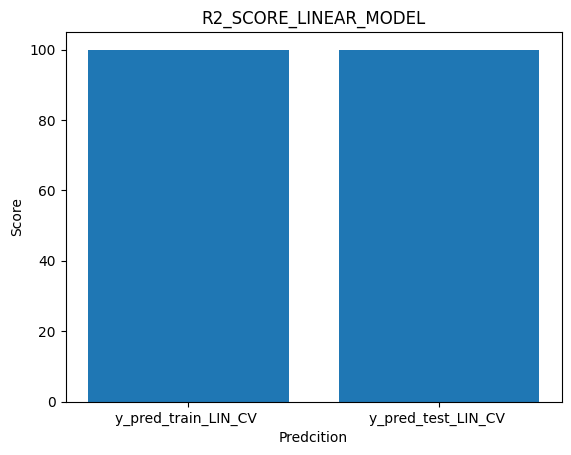

In [124]:
#[1]--------> FOR RUNNDING

#[ANY_KEY]--> FOR_EXIT

#|--------------------------------------GRID('R','LIN_R','CV','RobustScaler')->

GRID('R','LIN_R','CV','RobustScaler')

#(R)-->REGRESSION / (C)-->CLASSIFIER

#(LIN_R)-->LINEAR(RIDGE) / (XGB_R)-->XGBRegressor / (KNN_C)-->KNNeighboor / (DT_C)-->DesicionTree

#(V)-->VALIDATION / (CV)-->CROSS_VALIDATION

#(NO)-->WITHOUTSCALLING / (MinMaxScaler)-->MinMaxScaler / (StandardScaler)-->StandardScaler / (RobustScaler)-->RobustScaler